# Logistic Regression

z = W.X + b
f(x) = 1 / 1 + e^-z

# Import Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model Implementation

In [34]:
class LogisticRegression():
    
    def __init__(self,lr = 0.001,epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        self.weight = None
        self.bias = None
        cost = []
        it = []
    def fit(self, X, y):
        no_of_samples,no_of_features = X.shape
        self.weight = np.zeros(no_of_features)
        self.bias = 0
        cost = []
        it = []
        for i in range(self.epochs):
            z = np.dot(X,self.weight) + self.bias
            y_pred = 1 / (1 + np.exp(-z))

            dw = np.dot(X.T,y_pred - y)
            db = np.sum(y_pred - y)

            self.weight = self.weight - self.lr * (dw)
            self.bias = self.bias - self.lr * (db)
            
                        
            # for y = 1
            y1 =  y*np.log(y_pred)
            #for y = 0
            y0 = (1-y) * np.log(1-y_pred)
            
            los = (-1/no_of_samples) * (np.sum(y1 + y0))
            cost.append(los)
            it.append(i+1)
            plt.plot(it,cost, color = 'b')
    def predict(self,X):
        z = np.dot(X,self.weight) + self.bias
        y_pred = 1 / (1 + np.exp(-z))
        return y_pred

# Reading Dataset

##### Also Scale the feature and split the data into Training and Test Sets

In [35]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:2].values.astype(np.float64)
y = dataset.iloc[:,2].values.astype(np.float64)
print(X[:,1].max())
X[:,0] = (X[:,0] / X[:,0].max()) 
X[:,1] = (X[:,1] / X[:,1].max())
X_train = X[0 : int(X.shape[0]*0.8),:]
y_train = y[0 : int(y.size * 0.8)]
X_test, y_test = X[int(X.shape[0]*0.8) :,:], y[int(y.size*0.8):]

150000.0


# Fit the Data to the Model

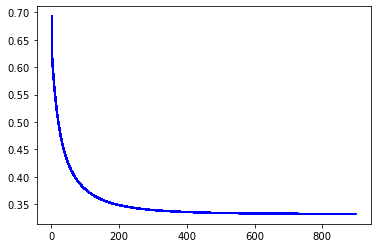

In [36]:
classifier = LogisticRegression(0.01,900)
classifier.fit(X_train,y_train)

# Make Predictions Over Test Set

In [38]:
y_pred = np.where(classifier.predict(X_test) >= 0.5, 1 , 0)


# y_pred = classifier.predict(X_test)
# y1 =  y_test*np.log(y_pred)
#             #for y = 0
# y0 = (1-y_test) * np.log(1-y_pred)
            
# los = (-1/80) * (np.sum(y1 + y0))
# print(los)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]]


# Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


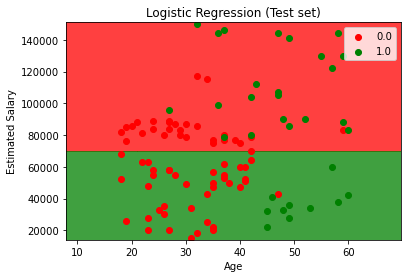

In [40]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:2].values.astype(np.float64)
y = dataset.iloc[:,2].values.astype(np.float64)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
classifier.fit(X_train, y_train)
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()